In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model, Model
import keras.backend as K
from keras.layers.core import Lambda
import tensorflow as tf

### Run predictions

In [29]:
model = load_model('models/model_big_1.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 32)          9248      
__________

In [33]:
%run utils.py
%run cam.py

In [23]:
image_size = 28
frame_duration = 1.0
overlap = 0.5
X, y = make_data_pipeline(file_names,labels,image_size,frame_duration,overlap)

Generating training data...
Processing session:  data/ML101_KS.csv . ( 1  of  16 )
Processing session:  data/ML101_US.csv . ( 2  of  16 )104/117
Processing session:  data/ML102_KS.csv . ( 3  of  16 )108/112
Processing session:  data/ML102_US.csv . ( 4  of  16 )107/111
Processing session:  data/ML103_KS.csv . ( 5  of  16 )106/109
Processing session:  data/ML103_US.csv . ( 6  of  16 )89/113
Processing session:  data/ML104_KS.csv . ( 7  of  16 )
Interpolating 101/101nterpolating 55/101Processing session:  data/ML104_US.csv . ( 8  of  16 )
Interpolating 102/102nterpolating 58/102Processing session:  data/ML105_KS.csv . ( 9  of  16 )
Processing session:  data/ML105_US.csv . ( 10  of  16 )07/107
Processing session:  data/ML106_KS.csv . ( 11  of  16 )
Processing session:  data/ML106_US.csv . ( 12  of  16 )08/115
Processing session:  data/ML107_KS.csv . ( 13  of  16 )3/139Interpolating 136/139
Processing session:  data/ML107_US.csv . ( 14  of  16 )3/123Interpolating 122/123
Processing session:

In [24]:
predictions = model.predict(X)
predictions = np.argmax(predictions, axis=1)

In [25]:
predictions.shape, y.shape

((1821,), (1821,))

In [26]:
tp = X[(predictions == y) & (y == 1)]
tn = X[(predictions == y) & (y == 0)]
fp = X[(predictions != y) & (y == 0)]
fn = X[(predictions != y) & (y == 1)]

In [27]:
tp.shape[0], tn.shape[0], fp.shape[0], fn.shape[0],

(858, 873, 41, 49)

In [42]:
%run cam.py

In [43]:
tp_cam, tp_heat = naive_cam(model, tp)
tn_cam, tn_heat = naive_cam(model, tn)
fp_cam, fp_heat = naive_cam(model, fp)
fn_cam, fn_heat = naive_cam(model, fn)

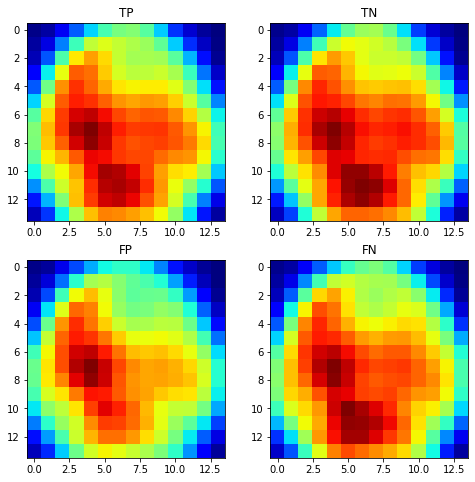

In [44]:
fig= plt.figure(figsize=(8, 8))
rows = 2
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(tp_heat, cmap='jet')
plt.title('TP')

fig.add_subplot(rows, cols, 2)
plt.imshow(tn_heat, cmap='jet')
plt.title('TN')

fig.add_subplot(rows, cols, 3)
plt.imshow(fp_heat, cmap='jet')
plt.title('FP')

fig.add_subplot(rows, cols, 4)
plt.imshow(fn_heat, cmap='jet')
plt.title('FN')
plt.show()

In [46]:
tp_cam, tp_heat = grad_cam(model, tp, 1)
tn_cam, tn_heat = grad_cam(model, tn, 0)
fp_cam, fp_heat = grad_cam(model, fp, 1)
fn_cam, fn_heat = grad_cam(model, fn, 0)

In [40]:
scaler = MinMaxScaler()
tp_heat = scaler.fit_transform(tp_heat)
scaler = MinMaxScaler()
tn_heat = scaler.fit_transform(tn_heat)
scaler = MinMaxScaler()
fp_heat = scaler.fit_transform(fp_heat)
scaler = MinMaxScaler()
fn_heat = scaler.fit_transform(fn_heat)

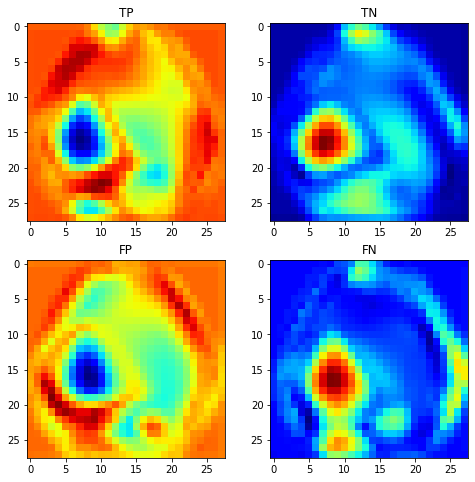

In [47]:
from matplotlib.colors import Normalize

fig= plt.figure(figsize=(8, 8))
rows = 2
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(tp_heat, cmap='jet')
plt.title('TP')

fig.add_subplot(rows, cols, 2)
plt.imshow(tn_heat, cmap='jet')
plt.title('TN')

fig.add_subplot(rows, cols, 3)
plt.imshow(fp_heat, cmap='jet')
plt.title('FP')

fig.add_subplot(rows, cols, 4)
plt.imshow(fn_heat, cmap='jet')
plt.title('FN')
plt.show()

0.99797285

In [137]:
tp_heat = tp_heat.flatten().tolist()
tn_heat = tn_heat.flatten().tolist()
fp_heat = fp_heat.flatten().tolist()
fn_heat = fn_heat.flatten().tolist()

In [138]:
with open('../proyecto-insideout/data/cam_confusion.json', 'w') as file:
    json.dump({
        'truePositive': tp_heat,
        'trueNegative': tn_heat,
        'falsePositive': fp_heat,
        'falseNegative': fn_heat,
    }, file)

784